In [566]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('CO2_USA.csv')
df.head(5)

,Country,Year,CO2_emission,CO2_emission_pre,Population,Density,Area,GDP,real_GDP,Temperature
0,United States,1961,1.220000e+11,119000000000,183691000,19.598703,9372610.0,562.2,3345.7,51.87
1,United States,1962,1.250000e+11,122000000000,186538000,19.902460,9372610.0,603.9,3550.7,51.90
2,United States,1963,1.280000e+11,125000000000,189242000,20.190961,9372610.0,637.5,3705.3,52.26
3,United States,1964,1.310000e+11,128000000000,191889000,20.473379,9372610.0,684.5,3918.8,51.67
4,United States,1965,1.350000e+11,131000000000,194303000,20.730938,9372610.0,742.3,4173.4,51.69


In [567]:
from sklearn.preprocessing import StandardScaler
X0 = df[['Density', 'GDP', 'Temperature', 'CO2_emission_pre']]
y = df['CO2_emission']
X = sm.add_constant(X0)

#OLS Regression
ols_model = sm.OLS(y, X).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CO2_emission   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.455e+05
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          9.92e-126
Time:                        21:04:33   Log-Likelihood:                -1280.5
No. Observations:                  60   AIC:                             2571.
Df Residuals:                      55   BIC:                             2581.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.765e+10   5.89e+09     -2.994      0.004   -2.95e+10   -5.84e+09
Density           1.536e+09   3.34e+08      4.599      0.000    8.67e+08    2.21e+09
GDP              -1.681e+05   6.21e+04     -2.707      0.009   -2.92e+05   -4.36e+04
Temperature      -4.088e+07   8.37e+07     -0.488      0.627   -2.09e+08    1.27e+08
CO2_emission_pre     0.9372      0.021     45.517      0.000       0.896       0.979
==============================================================================
Omnibus:                        0.182   Durbin-Watson:                   2.362
Prob(Omnibus):                  0.913   Jarque-Bera (JB):                0.247
Skew:                          -0.123   Prob(JB):                        0.884
Kurtosis:                       2.804   Cond. No.                     2.62e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [568]:
#WLS Regression
weights = 1 / df['real_GDP']
wls_model = sm.WLS(y, X, weights=weights).fit()
wls_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:           CO2_emission   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.026e+05
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          9.44e-125
Time:                        21:04:33   Log-Likelihood:                -1281.6
No. Observations:                  60   AIC:                             2573.
Df Residuals:                      55   BIC:                             2584.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.738e+10   6.52e+09     -2.667      0.010   -3.04e+10   -4.32e+09
Density           1.423e+09    3.3e+08      4.311      0.000    7.61e+08    2.08e+09
GDP              -2.145e+05   5.83e+04     -3.680      0.001   -3.31e+05   -9.77e+04
Temperature      -2.495e+07   9.16e+07     -0.273      0.786   -2.08e+08    1.59e+08
CO2_emission_pre     0.9465      0.020     47.365      0.000       0.906       0.987
==============================================================================
Omnibus:                        1.567   Durbin-Watson:                   2.464
Prob(Omnibus):                  0.457   Jarque-Bera (JB):                1.573
Skew:                          -0.333   Prob(JB):                        0.455
Kurtosis:                       2.569   Cond. No.                     2.55e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [569]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
# Elastic Net Model
elastic_net = ElasticNet()

# Grid Search for parameters tuning
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'l1_ratio': np.arange(0.0, 1.0, 0.1)
}

grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5)
grid_search.fit(X0, y)

# Best model
best_model = grid_search.best_estimator_
best_model

ElasticNet(alpha=1, l1_ratio=0.8)

In [570]:
elastic_net = ElasticNet(alpha=1, l1_ratio=0.8, random_state=0)
elastic_net.fit(X0, y)
y_pred = elastic_net.predict(X0)
ela_residuals = y - y_pred

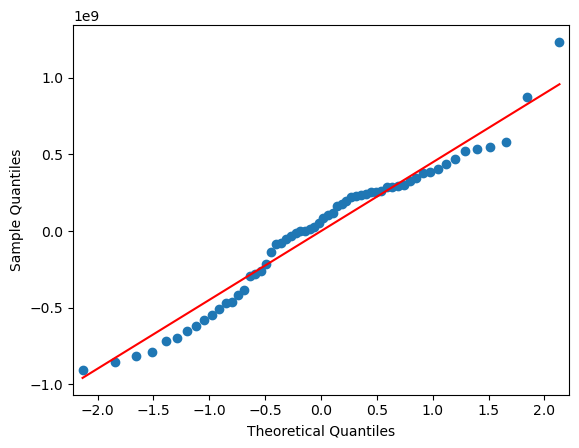

In [571]:
#OLS QQ plot
ols_residuals = ols_model.resid
fig = sm.qqplot(ols_residuals, line='s')
plt.show()

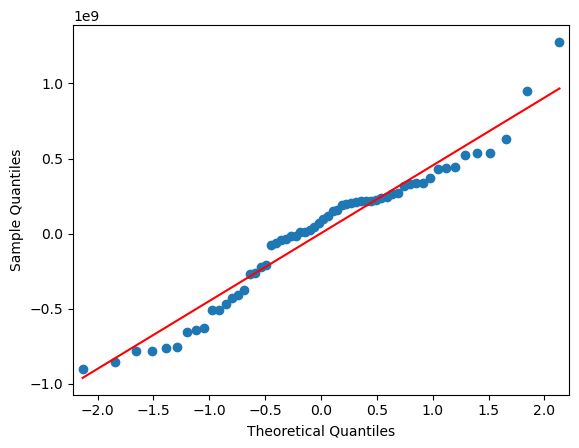

In [572]:
#WLS QQ plot
wls_residuals = wls_model.resid
fig = sm.qqplot(wls_residuals, line='s')
plt.show()

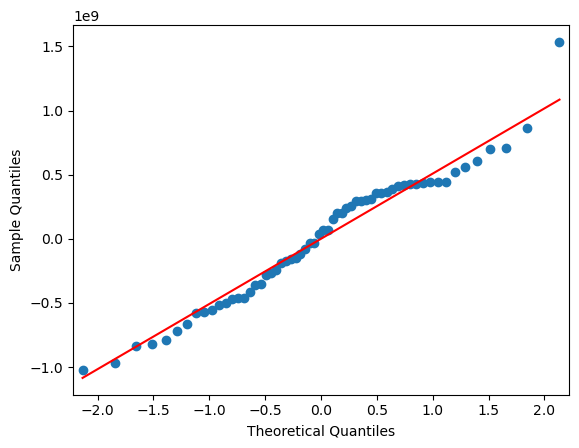

In [573]:
#Elastic QQ plot
fig = sm.qqplot(ela_residuals, line='s')
plt.show()

In [574]:
#JB test
from scipy.stats import jarque_bera
ols_jb_statistic, ols_p_value = jarque_bera(ols_residuals)
print(f"JB Statistic: {ols_jb_statistic}, P-value: {ols_p_value}")
#The ols_residuals is normally distributed
wls_jb_statistic, wls_p_value = jarque_bera(wls_residuals)
print(f"JB Statistic: {wls_jb_statistic}, P-value: {wls_p_value}")
#The wls_residuals is normally distributed
ela_jb_statistic, ela_p_value = jarque_bera(ela_residuals)
print(f"JB Statistic: {ela_jb_statistic}, P-value: {ela_p_value}")
#The ela_residuals is normally distributed

JB Statistic: 0.2466206988556114, P-value: 0.8839892744194194
JB Statistic: 0.07211508203031514, P-value: 0.9645847886982902
JB Statistic: 0.13337637178527237, P-value: 0.9354868538620151


In [575]:
#BP test
from statsmodels.stats.diagnostic import het_breuschpagan
ols_bp = het_breuschpagan(ols_residuals, ols_model.model.exog)
print(f"BP Statistic: {ols_bp[0]}, P-value: {ols_bp[1]}")
#OLS have no evidence of heteroscedasticity
wls_bp = het_breuschpagan(wls_residuals, wls_model.model.exog)
print(f"BP Statistic: {wls_bp[0]}, P-value: {wls_bp[1]}")
#WLS have no evidence of heteroscedasticity
ela_bp = het_breuschpagan(ela_residuals, X)
print(f"BP Statistic: {ela_bp[0]}, P-value: {ela_bp[1]}")
#Elastic have no evidence of heteroscedasticity

BP Statistic: 1.9276571231962714, P-value: 0.7490626561412652
BP Statistic: 2.3518145090237685, P-value: 0.6713520946350606
BP Statistic: 2.7728148285724163, P-value: 0.596534409655421


In [576]:
# Calculating the Durbin-Watson statistic
from statsmodels.stats.stattools import durbin_watson
ols_dw_statistic = durbin_watson(ols_residuals)
print(f"Durbin-Watson Statistic: {ols_dw_statistic}")
#OLS have negative autocorrelation
wls_dw_statistic = durbin_watson(wls_residuals)
print(f"Durbin-Watson Statistic: {wls_dw_statistic}")
#WLS have negative autocorrelation
ela_dw_stat = durbin_watson(ela_residuals)
print(f"Durbin-Watson statistic: {ela_dw_stat}")
#Elastic have negative autocorrelation

Durbin-Watson Statistic: 2.362036198320128
Durbin-Watson Statistic: 2.368844028429315
Durbin-Watson statistic: 2.017577340093516


In [577]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# Print VIF for each independent variable
for i in range(1, len(vif_data)):
    print(f"VIF for variable {i}: {vif_data[i]}")

#There exists multicollinearity

VIF for variable 1: 690.6869834590225
VIF for variable 2: 43.47573390171569
VIF for variable 3: 2.0755235038824758
VIF for variable 4: 911.8144361391603


In [578]:
#Back testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X0['weight'] = 1 / df['real_GDP']
X_train, X_test, y_train, y_test = train_test_split(X0, y, test_size=0.2, random_state=0)
weights_train = X_train['weight']

X_train = X_train.drop('weight', axis=1)
X_test = X_test.drop('weight', axis=1)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

ols_model_b_t = sm.OLS(y_train, X_train_const).fit()
ols_mse = mean_squared_error(y_test, ols_model_b_t.predict(X_test_const))
print(f"Mean Squared Error of OLS: {ols_mse}")

wls_model_b_t = sm.WLS(y_train, X_train_const, weights=weights_train).fit()
wls_mse = mean_squared_error(y_test, wls_model_b_t.predict(X_test_const))
print(f"Mean Squared Error of WLS: {wls_mse}")

elastic_net_b_t = ElasticNet(alpha=1, l1_ratio=0.8, random_state=0)
elastic_net_b_t.fit(X_train, y_train)
ela_mse = mean_squared_error(y_test, elastic_net.predict(X_test))
print(f"Mean Squared Error of elastic: {ela_mse}")

Mean Squared Error of OLS: 1.5391763188007203e+17
Mean Squared Error of WLS: 1.7133745703147485e+17
Mean Squared Error of elastic: 2.4191340051119613e+17
